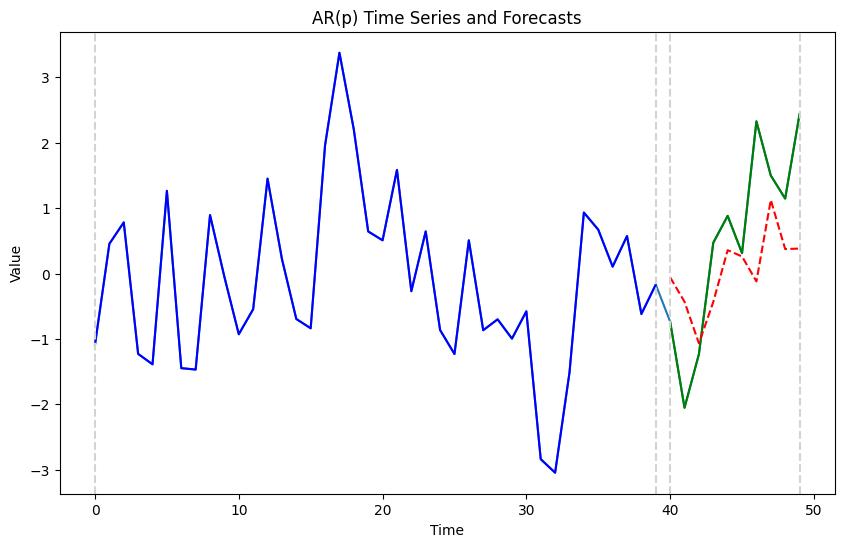

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_process import ArmaProcess

# Generate synthetic AR(p) series
np.random.seed(123)
ar_params = np.array([1, -0.5, 0.25])
ma_params = np.array([1])
ar_process = ArmaProcess(ar_params, ma_params)
synthetic_ar_data = ar_process.generate_sample(nsample=50)
synthetic_ar_series = pd.Series(synthetic_ar_data)

# Split into train and test sets
train_size = int(len(synthetic_ar_series) * 0.8)
train, test = synthetic_ar_series[0:train_size], synthetic_ar_series[train_size:]

# Estimate using AR model and perform one-step-ahead forecasting
model = AutoReg(train, lags=2)
model_fit = model.fit()
forecasts = []
for t in range(len(test)):
    end = len(train) + t
    model = AutoReg(synthetic_ar_series[:end], lags=2)
    model_fit = model.fit()
    forecast = model_fit.predict(start=end, end=end)
    forecasts.append(forecast.iloc[0])

# Combine forecasts and test set for plotting
forecasts_series = pd.Series(forecasts, index=test.index)

# Plot the original series and forecasts
plt.figure(figsize=(10, 6))
plt.plot(synthetic_ar_series, label='Original Series')
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Test Set', color='green')
plt.plot(forecasts_series, label='One-Step-Ahead Forecast', color='red', linestyle='--')

# Add vertical lines for the beginning and end of the train and test sets
plt.axvline(train.index[0], color='lightgrey', linestyle='--', label='Start Training')
plt.axvline(train.index[-1], color='lightgrey', linestyle='--', label='End Training')
plt.axvline(test.index[0], color='lightgrey', linestyle='--', label='Start Testing')
plt.axvline(test.index[-1], color='lightgrey', linestyle='--', label='End Testing')

plt.title('AR(p) Time Series and Forecasts')
plt.xlabel('Time')
plt.ylabel('Value')
# plt.legend()
plt.show()

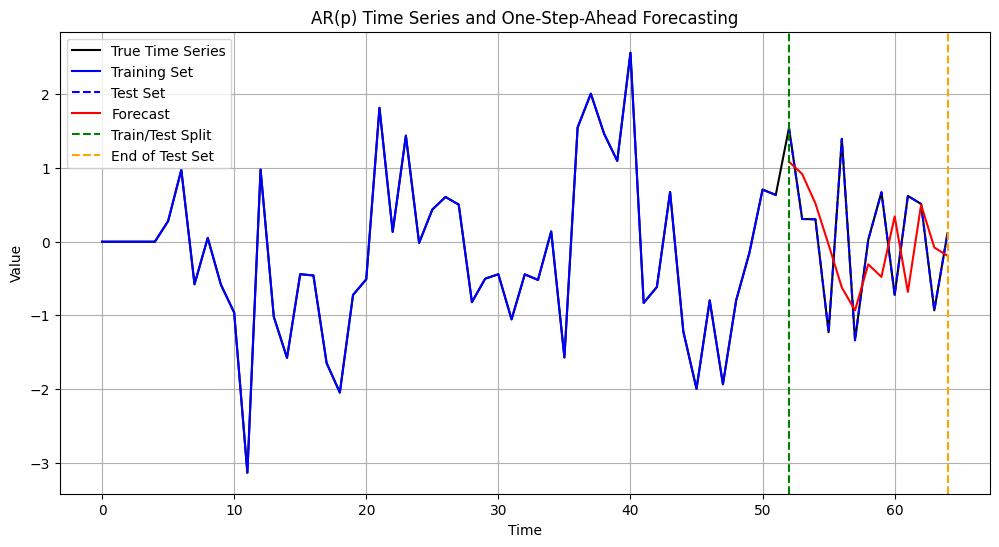

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 65
n_train = np.round(n*0.8).astype(int)
n_test = n - n_train
p = 5  # Order of the AR model

# Automatically generate coefficients for the AR(p) model
coeffs = np.random.uniform(-0.5, 0.5, p)

# Create a synthetic AR(p) time series
n_total = n_train + n_test
series = np.zeros(n_total)
noise_std = 1.0
for t in range(p, n_total):
    series[t] = np.dot(coeffs, series[t-p:t][::-1]) + np.random.normal(0, noise_std)

# Split into training and test sets
train_series = series[:n_train]
test_series = series[n_train:]

# Fit the AR model on the training set
ar_model = AutoReg(train_series, lags=p)
ar_model_fit = ar_model.fit()

# One-step-ahead forecasting for the test set
forecasts = []
history = list(train_series)

for t in range(len(test_series)):
    end = n_train + t
    ar_model = AutoReg(series[:end], lags=p)
    ar_model_fit = ar_model.fit()
    forecast = ar_model_fit.predict(start=end, end=end)
    forecasts.append(forecast[0])  # Access the first element directly

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the entire time series
plt.plot(series, label='True Time Series', color='black')

# Plot the training and test forecasts
plt.plot(range(n_train), train_series, label='Training Set', color='blue')
plt.plot(range(n_train, n_total), test_series, label='Test Set', color='blue', linestyle='dashed')
plt.plot(range(n_train, n_total), forecasts, label='Forecast', color='red')

# Add vertical lines for the start and end of the train and test sets
plt.axvline(x=n_train, color='green', linestyle='--', label='Train/Test Split')
plt.axvline(x=n_total-1, color='orange', linestyle='--', label='End of Test Set')

# Add titles and labels
plt.title('AR(p) Time Series and One-Step-Ahead Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
